# Import Library

In [1]:
# Olah Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pengembangan Model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Data Loading

In [2]:
# Path 
allDietsDfPath = 'data/All_Diets.csv'
allUsersDfPath = 'data/ObesityDataSet_cleaned_and_data_sinthetic.csv'

# Dataset
allDietsDf = pd.read_csv(allDietsDfPath)
allUsersDf = pd.read_csv(allUsersDfPath)


In [3]:
allDietsDf.sample(10)

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
3900,keto,Tuna Egg Salad with Sour Cream (Keto),american,98.33,6.68,74.47,2022-10-16,18:06:27
4911,mediterranean,Roasted Fish Catalan,mediterranean,96.52,32.82,20.63,2022-10-16,16:46:44
3197,keto,Keto Pancakes: Cinnamon Delight,american,28.94,36.86,157.86,2022-10-16,18:01:17
4148,keto,Easy Keto Low Carb Meatballs Recipe - Italian ...,italian,104.51,28.37,114.97,2022-10-16,18:08:17
4613,mediterranean,Mediterranean Tuna Pasta recipes,mediterranean,179.69,280.95,123.53,2022-10-16,16:44:56
5091,mediterranean,Autumn Olive Medley,french,363.39,112.36,306.17,2022-10-16,16:47:44
4657,mediterranean,Mediterranean Beef and Bean Stew,mediterranean,230.79,131.98,104.49,2022-10-16,16:45:10
7676,dash,Chicken with Green Olives,mediterranean,183.41,432.21,140.98,2022-10-16,20:39:57
4071,keto,Keto Low-Carb Creamy Garlic Shrimp Alfredo,italian,114.37,32.89,177.04,2022-10-16,18:07:44
2497,vegan,Easy Middle Eastern Fried Tomatoes: Jordanian ...,middle eastern,6.26,33.50,55.18,2022-10-16,20:11:38


In [4]:
allUsersDf.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,BMI
0,1,female,21,1.62,64,yes,no,sometimes,3,sometimes,no,between 1 and 2 l,no,0,3 to 5,no,public_transportation,normal_weight,24.386526
1,2,female,21,1.52,56,yes,no,always,3,sometimes,yes,more than 2 l,yes,4 to 5,0 to 2,sometimes,public_transportation,normal_weight,24.238227
2,3,male,23,1.80,77,yes,no,sometimes,3,sometimes,no,between 1 and 2 l,no,2 to 4,3 to 5,frequently,public_transportation,normal_weight,23.765432
3,4,male,27,1.80,87,no,no,always,3,sometimes,no,between 1 and 2 l,no,2 to 4,0 to 2,frequently,walking,overweight_level_i,26.851852
4,5,male,22,1.78,90,no,no,sometimes,1,sometimes,no,between 1 and 2 l,no,0,0 to 2,sometimes,public_transportation,overweight_level_ii,28.342381


# Data Assessing

In [5]:
# Cek shape dataset tipe diet
allDietsDf.shape

(7806, 8)

In [6]:
# Cek shape dataset users
allUsersDf.shape

(2111, 19)

## Informasi Umum

### Dataset Diet

In [7]:
allDietsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diet_type        7806 non-null   object 
 1   Recipe_name      7806 non-null   object 
 2   Cuisine_type     7806 non-null   object 
 3   Protein(g)       7806 non-null   float64
 4   Carbs(g)         7806 non-null   float64
 5   Fat(g)           7806 non-null   float64
 6   Extraction_day   7806 non-null   object 
 7   Extraction_time  7806 non-null   object 
dtypes: float64(3), object(5)
memory usage: 488.0+ KB


### Dataset *Users*

In [8]:
allUsersDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2111 non-null   object 
 1   Gender                          2111 non-null   object 
 2   Age                             2111 non-null   int64  
 3   Height                          2111 non-null   float64
 4   Weight                          2111 non-null   int64  
 5   family_history_with_overweight  2111 non-null   object 
 6   FAVC                            2111 non-null   object 
 7   FCVC                            2111 non-null   object 
 8   NCP                             2111 non-null   int64  
 9   CAEC                            2111 non-null   object 
 10  SMOKE                           2111 non-null   object 
 11  CH2O                            2111 non-null   object 
 12  SCC                             21

## Cek Data Null

### Dataset Diet

In [9]:
allDietsDf.isna().sum()

Diet_type          0
Recipe_name        0
Cuisine_type       0
Protein(g)         0
Carbs(g)           0
Fat(g)             0
Extraction_day     0
Extraction_time    0
dtype: int64

### Dataset *Users*

In [10]:
allUsersDf.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
BMI                               0
dtype: int64

## Cek Data Duplikat

### Dataset Diet

In [11]:
allDietsDf.duplicated().sum()

5

### Dataset *Users*

In [12]:
allUsersDf.duplicated().sum()

0

## Nilai Statistik Dataset

### Dataset Diet

In [13]:
allDietsDf.describe()

,Protein(g),Carbs(g),Fat(g)
count,7806.000000,7806.000000,7806.000000
mean,83.231498,152.123189,117.328542
std,89.797282,185.907322,122.098117
min,0.000000,0.060000,0.000000
25%,24.415000,36.162500,41.067500
50%,56.280000,93.415000,84.865000
75%,112.357500,205.915000,158.290000
max,1273.610000,3405.550000,1930.240000


### Dataset *Users*

In [14]:
allUsersDf.describe()

,Age,Height,Weight,NCP,BMI
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701677,86.588820,2.687826,29.700159
std,6.357078,0.093305,26.188572,0.809680,8.011337
min,14.000000,1.450000,39.000000,1.000000,12.998685
25%,20.000000,1.630000,65.500000,3.000000,24.325802
50%,23.000000,1.700499,83.000000,3.000000,28.719089
75%,26.000000,1.768464,107.000000,3.000000,36.016501
max,61.000000,1.980000,173.000000,4.000000,50.811753


Dari hasil analisa pada tahap **Data Assessing** kesimpulannya adalah:
1. Dataset Diet
   - Tidak terdapat kesalahan tipe data kolom
   - Tidak terdapat nilai *null*
   - Terdapat **5** data duplikat

Catatan:
Terdapat nilai 0 pada kolom **Protein(g)**, dan **Fat(g)** dari hasil eksekusi perintah *describe* yang perlu ditinjau ulang pada tahap **EDA**.
 
2. Dataset *Users*
   - Terdapat kesalahan tipe data pada kolom **Weight**, seharusnya *float* bukan *integer*
   - Tidak terdapat nilai *null*
   - Tidak terdapat data duplikat


# Data Cleaning

## Hapus Data Duplikat Dataset Diet

Penghapusan data duplikat pada dataset diet dilakukan secara langsung karena jumlahnya yang tergolong kecil dibanding total banyak data yang ada.

In [15]:
allDietsDf.shape

(7806, 8)

In [16]:
allDietsDf.drop_duplicates(inplace=True)

In [17]:
allDietsDf.shape

(7801, 8)

Saat ini pada dataset diet sudah tidak ada data duplikat

## Ubah Isi Nilai Kolom Resep Masakan Menjadi Kapital di Awal

In [18]:
allDietsDf['Recipe_name'] = allDietsDf['Recipe_name'].apply(lambda x: x.title())

## Ubah Tipe Data Kolom Weight Dataset *Users*

In [19]:
allUsersDf['Weight'] = allUsersDf.Weight.astype(float)

Saat ini, kolom **Weight** sudah berubah tipe data menjadi *float* dari yang semula *integer*.

# Exploratory Data Analysis (EDA)

## Deskripsi Variabel

### Data Diet

In [20]:
# Informasi dataset diet
allDietsDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7801 entries, 0 to 7805
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diet_type        7801 non-null   object 
 1   Recipe_name      7801 non-null   object 
 2   Cuisine_type     7801 non-null   object 
 3   Protein(g)       7801 non-null   float64
 4   Carbs(g)         7801 non-null   float64
 5   Fat(g)           7801 non-null   float64
 6   Extraction_day   7801 non-null   object 
 7   Extraction_time  7801 non-null   object 
dtypes: float64(3), object(5)
memory usage: 548.5+ KB


1. Diet_type: Tipe diet yang bersangkutan dengan satu baris data.
2. Recipe_name: Nama resep makanan.
3. Cuisine_type: Asal daerah resep makanan.
4. Protein(g): Banyak protein yang terkandung pada masakan dalam satuan *gram*.
5. Carbs(g): Banyak karbohidrat yang terkandung pada masakan dalam satuan *gram*.
6. Fat(g): Banyak lemak yang terkandung pada masakan dalam satuan *gram*.
7. Extraction_day: Tanggal resep dibuat.
8. Extraction_time: Waktu resep dibuat.

Untuk uraian lebih lanjut adalah sebagai berikut:
- Terdapat 5 kolom dengan tipe data object, yaitu Diet_type, Recipe_name, Cuisine_type, Extraction_day, Extraction_time.
- Terdapat 3 kolom dengan tipe data float, yaitu Protein(g), Carbs(g), dan Fat(g).

### Data *Users*

In [21]:
# Informasi dataset users
allUsersDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              2111 non-null   object 
 1   Gender                          2111 non-null   object 
 2   Age                             2111 non-null   int64  
 3   Height                          2111 non-null   float64
 4   Weight                          2111 non-null   float64
 5   family_history_with_overweight  2111 non-null   object 
 6   FAVC                            2111 non-null   object 
 7   FCVC                            2111 non-null   object 
 8   NCP                             2111 non-null   int64  
 9   CAEC                            2111 non-null   object 
 10  SMOKE                           2111 non-null   object 
 11  CH2O                            2111 non-null   object 
 12  SCC                             21

1. Id: Kolom index
2. BMI (*Body Mass Index*): Indeks masa tubuh ideal (target)
3. Gender: Jenis Kelamin 
4. Age: Umur
5. Height: Tinggi badan (inch)
6. Weight: Berat badan (kg)
7. family_history_with_overweight: Riwayat keluarga dengan berat badan berlebih (obesitas)
8. FAVC: Frekuensi mengkonsumsi makanan tinggi kalori
9.  FCVC: Frekuensi mengkonsumsi sayur-mayur
10. NCP: Jumlah makan pokok perhari
11. CAEC: Frekuensi makan cemilan
12. SMOKE: Kebiasaan merokok
13. CH2O: Jumlah minum air
14. SCC: Kebiasaan monitoring konsumsi kalori
15. FAF: Frekuensi kegiatan fisik
16. TUE: Waktu penggunaan perangkat (jam)
17. CALC: Frekuensi mengkonsumsi alkohol
18. MTRANS: Kategori transportasi yang digunakan
19. NObeyesdad: Kategori berat badan

Untuk uraian lebih lanjut adalah sebagai berikut:
- Terdapat 14 kolom dengan tipe data object, yaitu Id, Gender, family_history_with_overweight,FAVC,FCVC,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
- Terdapat 2 kolom dengan tipe data integer, yaitu Age dan NCP
- Terdapat 3 kolom dengan tipe data float, Height, Weight, dan BMI

## Menghapus Kolom yang Tidak Perlu
### Dataset Diet

In [22]:
allDietsDf = allDietsDf[['Diet_type', 'Recipe_name', 'Cuisine_type', 'Protein(g)', 'Carbs(g)', 'Fat(g)']]

allDietsDf.head()

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g)
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76
3,paleo,Strawberry Guacamole Recipes,mexican,9.62,75.78,59.89
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55


### Dataset *Users*

In [23]:
allUsersDf = allUsersDf[['id', 'BMI','Weight',  'Gender', 'Age', 'NObeyesdad', 'family_history_with_overweight']]

allUsersDf.head()

,id,BMI,Weight,Gender,Age,NObeyesdad,family_history_with_overweight
0,1,24.386526,64.0,female,21,normal_weight,yes
1,2,24.238227,56.0,female,21,normal_weight,yes
2,3,23.765432,77.0,male,23,normal_weight,yes
3,4,26.851852,87.0,male,27,overweight_level_i,no
4,5,28.342381,90.0,male,22,overweight_level_ii,no


## Cek Nilai *Unique* dan *Invalid Value* Kolom Kategorikal
### Data Diet

Diet_type

In [24]:
print('Jumlah nilai unik adalah', allDietsDf.Diet_type.nunique())
print('Uraian nilai unik: \n', allDietsDf.Diet_type.unique())

Jumlah nilai unik adalah 5
Uraian nilai unik: 
 ['paleo' 'vegan' 'keto' 'mediterranean' 'dash']


Cuisine_type

In [25]:
print('Jumlah nilai unik adalah', allDietsDf.Cuisine_type.nunique())
print('Uraian nilai unik: \n', allDietsDf.Cuisine_type.unique())

Jumlah nilai unik adalah 19
Uraian nilai unik: 
 ['american' 'south east asian' 'mexican' 'chinese' 'mediterranean'
 'italian' 'french' 'indian' 'nordic' 'eastern europe' 'central europe'
 'kosher' 'british' 'caribbean' 'south american' 'middle eastern' 'asian'
 'japanese' 'world']


Kesimpulan yang didapatkan adalah:
- **Tidak ada *invalid value*** pada kolom kategorikal di data diet.

### Data *Users*

Gender

In [26]:
print('Jumlah nilai unik adalah', allUsersDf.Gender.nunique())
print('Uraian nilai unik: \n', allUsersDf.Gender.unique())

Jumlah nilai unik adalah 2
Uraian nilai unik: 
 ['female' 'male']


family_history_with_overweight

In [27]:
print('Jumlah nilai unik adalah', allUsersDf.family_history_with_overweight.nunique())
print('Uraian nilai unik: \n', allUsersDf.family_history_with_overweight.unique())

Jumlah nilai unik adalah 2
Uraian nilai unik: 
 ['yes' 'no']


NObeyesdad

In [28]:
print('Jumlah nilai unik adalah', allUsersDf.NObeyesdad.nunique())
print('Uraian nilai unik: \n', allUsersDf.NObeyesdad.unique())

Jumlah nilai unik adalah 7
Uraian nilai unik: 
 ['normal_weight' 'overweight_level_i' 'overweight_level_ii'
 'obesity_type_i' 'insufficient_weight' 'obesity_type_ii'
 'obesity_type_iii']


Kesimpulan yang didapatkan adalah:
- **Tidak ada *invalid value*** pada kolom kategorikal di data *users*.

## Cek Invalid Value Kolom Numerik

### Data Diet

Protein(g)

In [29]:
print((allDietsDf['Protein(g)'] <= 0).sum())

17


Carbs(g)

In [30]:
print((allDietsDf['Carbs(g)'] <= 0).sum())

0


Fat(g)

In [31]:
print((allDietsDf['Fat(g)'] <= 0).sum())

38


Kesimpulan yang didapatkan adalah:
- Terdapat **17** data protein yang nilainya kurang dari 0. Yang perlu dilakukan adalah **menghapus** data-data itu, bertujuan untuk memberikan rekomendasi makanan dengan nilai gizi yang cukup.
- Terdapat **38** data lemak yang nilainya kurang dari 0. Yang perlu dilakukan adalah **mempertahankan** data-data itu, sebab kondisi itu diartikan makanan-makanan itu rendah lemak dan baik untuk dikonsumsi.

In [32]:
'''
Penghapusan nilai protein yang kurang dari
atau sama dengan 0 
'''
allDietsDf = allDietsDf[~(allDietsDf['Protein(g)'] <= 0)]

Catatan:
Perlu adanya pemeriksaan *outlier* untuk melihat persebaran data agar mengetahui informasi lebih lanjut.

### Data User

BMI

In [33]:
print((allUsersDf['BMI'] <= 0).sum())

0


Weight

In [34]:
print((allUsersDf['Weight'] <= 0).sum())

0


Age

In [35]:
print((allUsersDf['Age'] <= 0).sum())

0


Kesimpulan yang didapatkan adalah:
- **Tidak ada *invalid value*** pada kolom numerik di data *users*.

Catatan:
Perlu adanya pemeriksaan *outlier* untuk melihat persebaran data agar mengetahui informasi lebih lanjut.

## Cek *Outliers*

### Data Diet

Protein(g)

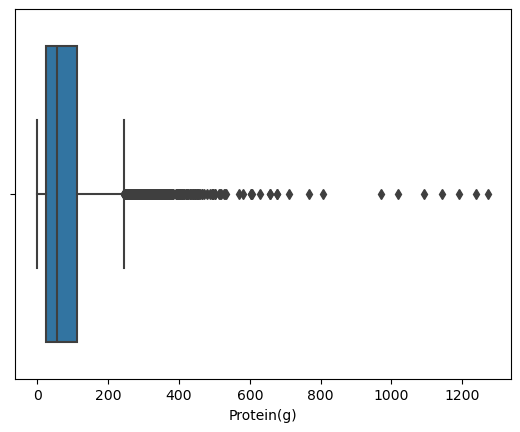

In [36]:
sns.boxplot(x=allDietsDf['Protein(g)'])
plt.savefig('assets/diet/protein1.png')

Carbs(g)

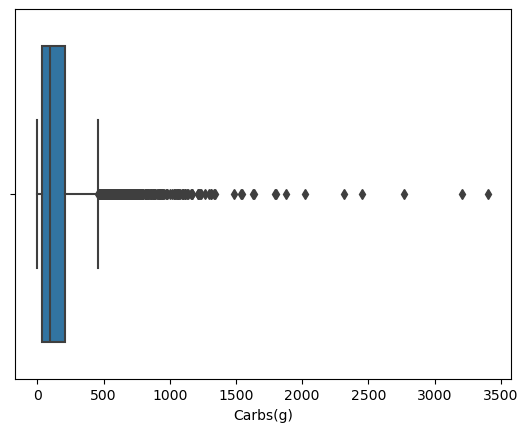

In [37]:
sns.boxplot(x=allDietsDf['Carbs(g)'])
plt.savefig('assets/diet/carbs1.png')

Fat(g)

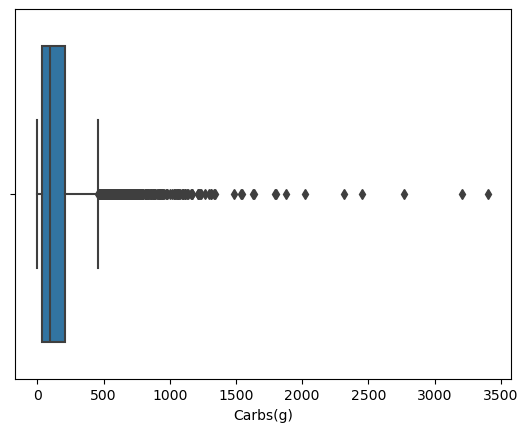

In [38]:
sns.boxplot(x=allDietsDf['Carbs(g)'])
plt.savefig('assets/diet/fat1.png')

Terdapat banyak nilai yang terindikasi *outliers* pada setiap kolom di atas, hal yang perlu dilakukan adalah peninjauan banyak presentase *outliers* tersebut pada total data. Jika memungkinkan akan dihapus.

### Data *Users*

BMI

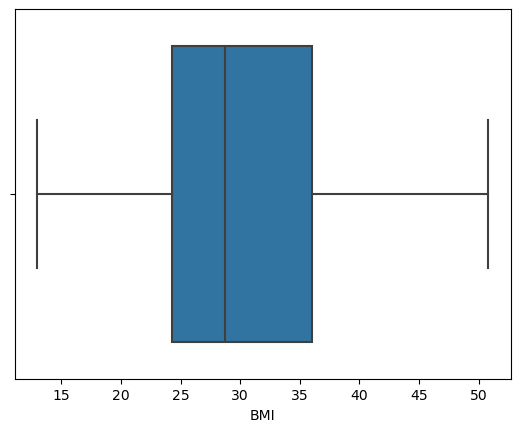

In [39]:
sns.boxplot(x=allUsersDf['BMI'])
plt.savefig('assets/users/bmi1.png')

Weight

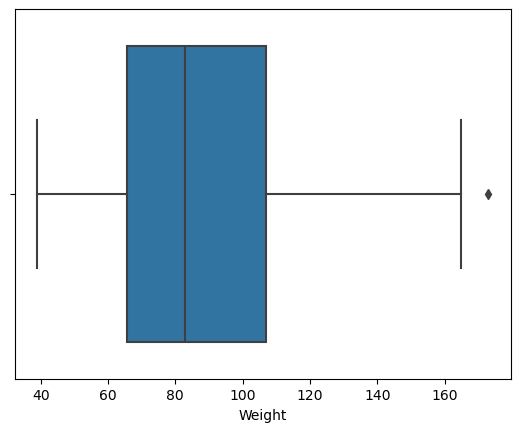

In [40]:
sns.boxplot(x=allUsersDf['Weight'])
plt.savefig('assets/users/weight1.png')

Age

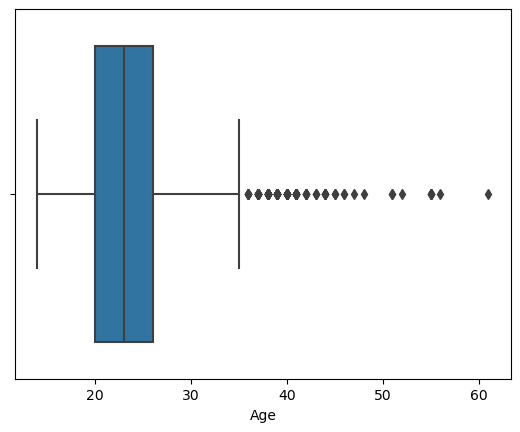

In [41]:
sns.boxplot(x=allUsersDf['Age'])
plt.savefig('assets/users/age1.png')

Terdapat beberapa kesimpulan sebagai berikut:
- Pada kolom **Weight**, banyak data *outlier* ada 1. Sehingga dapat dihapus.
- Pada kolom **Age**, banyak data *outlier* ada banyak. Sehingga perlu peninjauan banyak presentase *outliers* tersebut pada total data. Jika memungkinkan akan dihapus.

## Penanganan *Outliers*

### Rumus IQR

In [42]:
def iqrFormula(data):
    # Mengambil kuartil 1 dari keseluruhan data
    q1 = data.quantile(0.25)
    # Mengambil kuartil 3 dari keseluruhan data
    q3 = data.quantile(0.75)

    # Mengurangkan antara kuartil 1 dan 3
    iqr = q3 - q1

    # Batas atas
    upper = q3 + 1.5 * iqr
    
    # Batas bawah
    bottom = q1 - 1.5 * iqr

    # Rumus outliers
    outliers = ((data < bottom) | (data > upper))
    
    return outliers

### Data Diet

Dari hasil kesimpulan di atas, terdapat beberapa langkah yang harus dilakukan.

In [43]:
# Pengecekan shape data diet
allDietsDf.shape

(7784, 6)

Penerapan Rumus IQR

In [44]:
numericalDiet = allDietsDf.select_dtypes(include=['float64', 'int64'])

outliers = iqrFormula(numericalDiet)


Penghapusan Nilai Outlier

In [45]:
cleanedDiets = allDietsDf[~outliers.any(axis=1)]

In [46]:
cleanedDiets.shape

(6795, 6)

### Data *Users*

In [47]:
allUsersDf.shape

(2111, 7)

Penerapan Rumus IQR


In [48]:
numericalUsers = allUsersDf.select_dtypes(include=['float64', 'int64'])

outliers = iqrFormula(numericalUsers)

Penghapusan Nilai Outliers

In [49]:
cleanedUsers = allUsersDf[~outliers.any(axis=1)]

In [50]:
cleanedUsers.shape

(1950, 7)

## Pengecekan Ulang Nilai Outliers

### Data Diet

Protein(g)

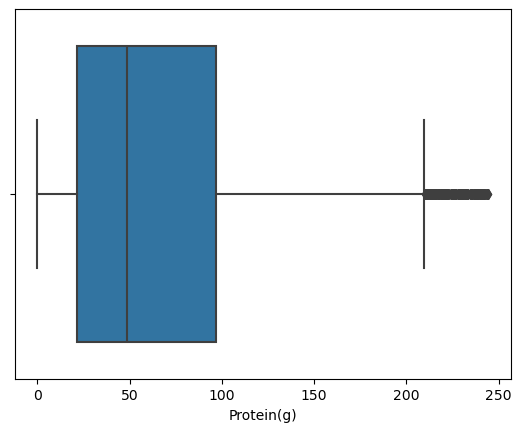

In [51]:
sns.boxplot(x=cleanedDiets['Protein(g)'])
plt.savefig('assets/diet/protein2.png')

Carbs(g)

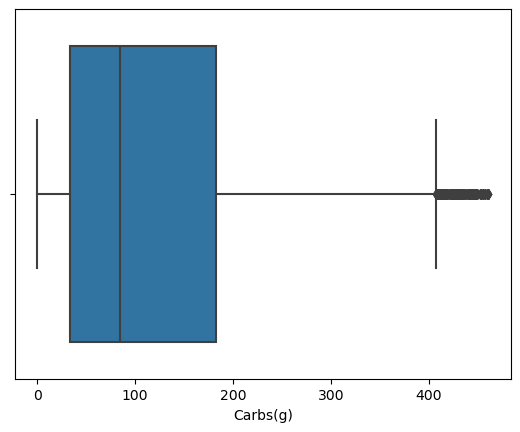

In [52]:
sns.boxplot(x=cleanedDiets['Carbs(g)'])
plt.savefig('assets/diet/carbs2.png')

Fat(g)

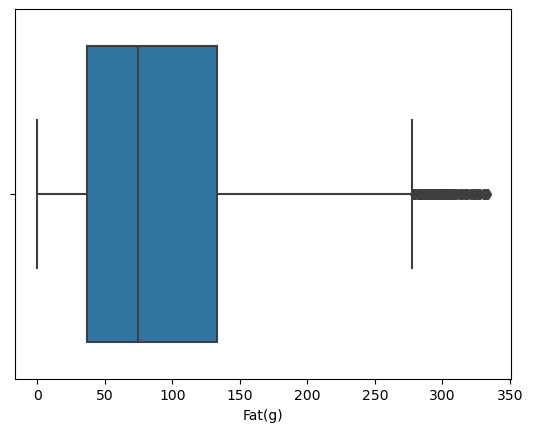

In [53]:
sns.boxplot(x=cleanedDiets['Fat(g)'])
plt.savefig('assets/diet/fat2.png')

Dari hasil cek di atas, masih terdapat beberapa nilai *outliers* di semua kolom. Maka perlu dilakukan penghapusan ulang.

### Data *Users*

BMI

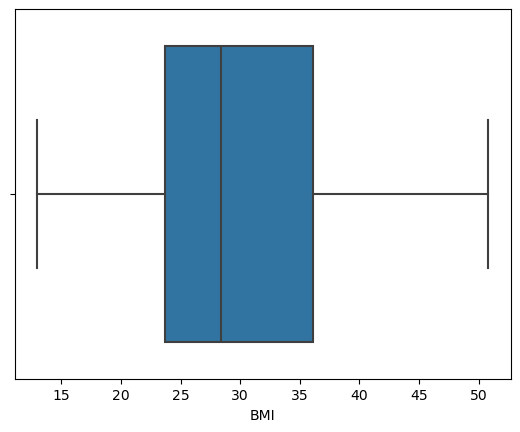

In [54]:
sns.boxplot(x=cleanedUsers['BMI'])
plt.savefig('assets/users/bmi2.png')

Weight


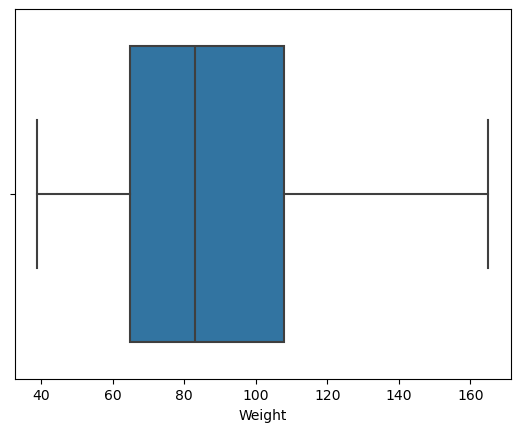

In [55]:
sns.boxplot(x=cleanedUsers['Weight'])
plt.savefig('assets/users/weight2.png')

Age

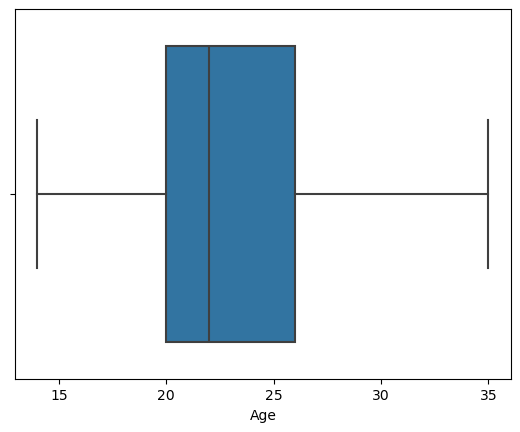

In [56]:
sns.boxplot(x=cleanedUsers['Age'])
plt.savefig('assets/users/age2.png')

Dari hasil di atas, sudah tidak terdapat nilai *outlier* pada setiap kolom dataset *users*. Maka data di atas sudah dapat digunakan untuk tahap selanjutnya.

## Penanganan Nilai *Outliers* Dataset Diet
Dari hasil pengulangan penerapan IQR yang sudah dilakukan, ternyata terdapat iterasi pengulangan tertentu yang dilakukan. Setelah kode di bawah, sudah tidak terdapat nilai *outliers* lagi pada dataset diet.

In [57]:
cleanedDiets.shape

(6795, 6)

Penerapan Rumus IQR dan Penghapusan Nilai *Outliers*

In [58]:
iteration = 8
for i in range(0,iteration):
    numericalDiet = cleanedDiets.select_dtypes(include=['float64', 'int64'])
    outliers = iqrFormula(numericalDiet)
    cleanedDiets = cleanedDiets[~outliers.any(axis=1)]

In [59]:
cleanedDiets.shape

(5960, 6)

## Pengecekan Ulang Nilai *Outliers* Dataset Diet

Protein(g)

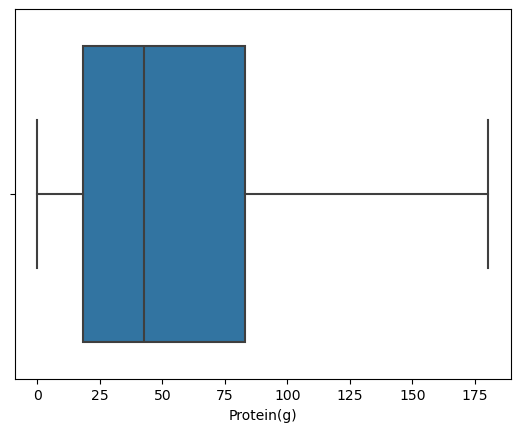

In [60]:
sns.boxplot(x=cleanedDiets['Protein(g)'])
plt.savefig('assets/diet/protein3.png')

Carbs(g)

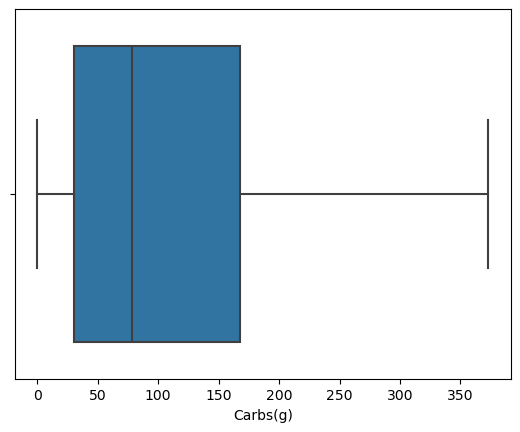

In [61]:
sns.boxplot(x=cleanedDiets['Carbs(g)'])
plt.savefig('assets/diet/carbs3.png')

Fat(g)

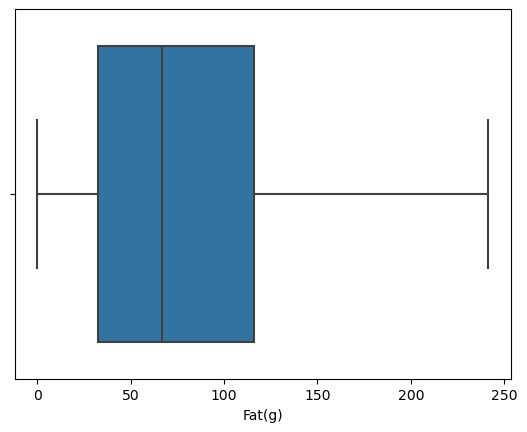

In [62]:
sns.boxplot(x=cleanedDiets['Fat(g)'])
plt.savefig('assets/diet/fat3.png')

Setelah melakukan **8** iterasi penerapan rumus IQR, terlihat bahwa sudah tidak terdapat nilai *outlier* dan data dapat digunakan pada tahap selanjutnya.

## Univariate Analysis
### Data Diet

In [63]:
cleanedDiets.head()

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g)
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76
3,paleo,Strawberry Guacamole Recipes,mexican,9.62,75.78,59.89
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55
5,paleo,Paleo Shrimp-Stuffed Mushrooms Recipes,mediterranean,68.62,34.15,42.44


Memisahkan Kategori Kolom

In [64]:
# Kolom Kategorikal
catDietFeatures = ['Diet_type', 'Cuisine_type']

Kolom **Recipe_name** tidak dilakukan analisis univarian sebab data *unique*-nya yang terlalu banyak.

1. Olah Categorical Features

    Buat Fungsi User-Defined

In [65]:
def featuresExtractDiet(feature, data=cleanedDiets):
    if feature == 'Cuisine_type':
        count = data[feature].value_counts()
        percent = 100 * data[feature].value_counts(normalize=True) 
        
        # Mengambil indeks yang akan dijumlahkan menjadi kategori "others"
        othersCount = count.iloc[4:].values
        othersPercent = percent.iloc[4:].values
        
        # Menghapus nilai sebelum dijadikan kategori "others"
        count = count.drop(count.index[4:])
        percent = percent.drop(percent.index[4:])
        
        # Menambahkan kategori "others" menjadi data baru
        othersCount = pd.Series(othersCount.sum(), index=['others'])
        othersPercent = pd.Series(othersPercent.sum(), index=['others'])  
        
        count = pd.concat([count, othersCount])
        percent = pd.concat([percent, othersPercent])
        
        df = pd.DataFrame({
            'Jumlah sampel':count, 
            'Persentase':percent.round(1)
        })
        print(df)
        
        plt.figure(figsize=(8, 8))
        percent.plot(kind='pie', autopct='%1.1f%%' ,title='Jumlah Presentase ' + feature)
        
    elif feature == 'Diet_type':
        count = data[feature].value_counts()
        percent = 100 * data[feature].value_counts(normalize=True)   
        df = pd.DataFrame({
            'Jumlah sampel':count, 
            'Persentase':percent.round(1)
            })
        print(df)
        
        count.plot(kind='bar', title='Jumlah Kolom ' + feature, rot=0)

Kolom Diet_type

               Jumlah sampel  Persentase
Diet_type                               
mediterranean           1370        23.0
dash                    1354        22.7
vegan                   1148        19.3
keto                    1104        18.5
paleo                    984        16.5


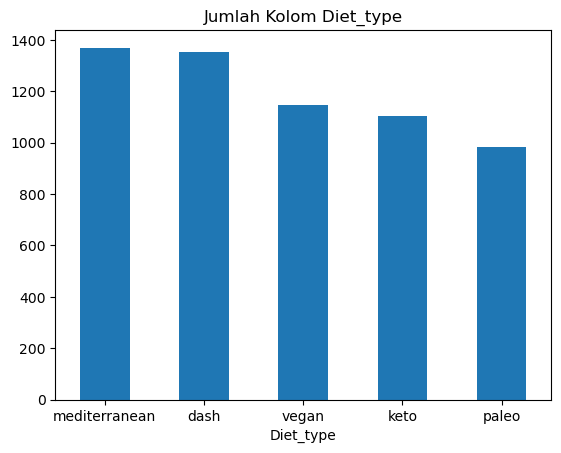

In [66]:
feature = catDietFeatures[0]
featuresExtractDiet(feature)
plt.savefig('assets/diet/uni-diet-type.png')

Kolom Cuisine_type

               Jumlah sampel  Persentase
american                2057        34.5
mediterranean           1414        23.7
italian                  592         9.9
french                   466         7.8
others                  1431        24.0


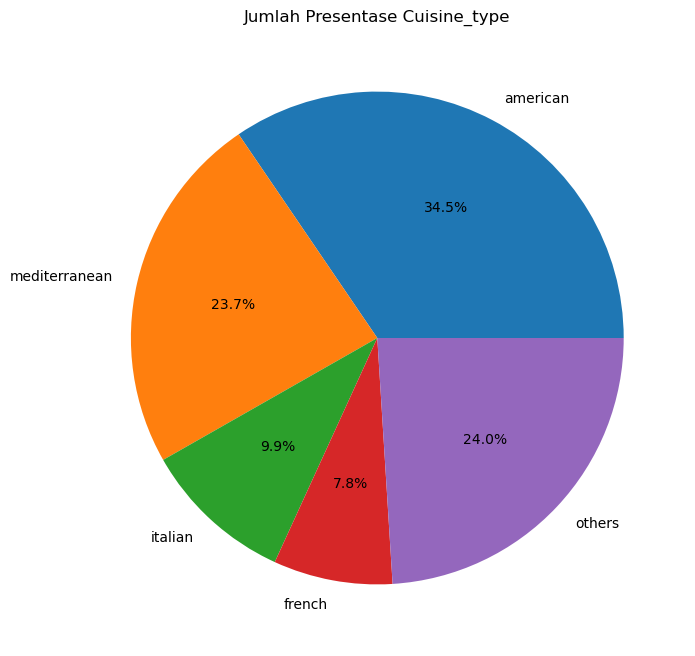

In [67]:
feature = catDietFeatures[1]
featuresExtractDiet(feature)
plt.savefig('assets/diet/uni-cuisine-type.png')

2. Olah Numerical Features

In [68]:
cleanedDiets.sample(5)

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g)
6731,dash,Kitchen Sink Vegetable Lasagna With Spiced Tof...,italian,144.81,168.57,118.63
7212,dash,Chicken And Avocado Salad,asian,57.41,114.18,235.61
6888,dash,Fresh Mint Ice Cream,french,28.01,205.21,44.29
5513,mediterranean,Homemade Greek Salad Dressing,mediterranean,0.67,4.80,108.30
726,paleo,Paleo Baked Tuna Cakes - Paleo And Gluten-Free,mediterranean,105.58,58.76,166.85


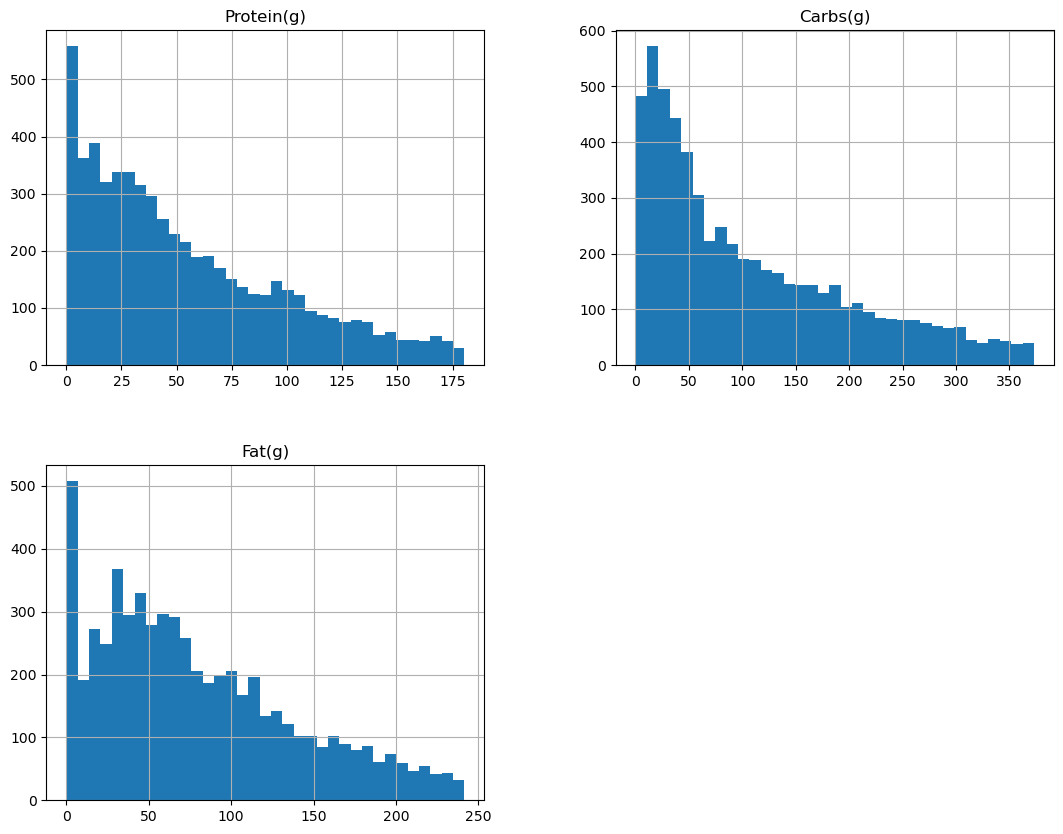

In [69]:
cleanedDiets.hist(bins=35, figsize=(13,10))
plt.savefig('assets/diet/uni-numerical.png')
plt.show()

Dari hasil pemetaan kolom numerik di atas, dapat disimpulkan bahwa:

1. Kolom Protein(g)
   - Persebaran data cenderung ke kanan (*Right-Skewed*)
   - Banyak data terbanyak ada di angka 10
   - Banyak data terendah ada di kisaran angka 150 - 175

2. Kolom Carbs(g)
   - Persebaran data cenderung ke kanan (*Right-Skewed*)
   - Banyak data terbanyak ada di angka 20
   - Banyak data terendah ada di kisaran angka 300 - 350

3. Kolom Fat(g)
   - Persebaran data cenderung ke kanan (*Right-Skewed*)
   - Banyak data terbanyak ada di angka 10
   - Banyak data terendah ada di kisaran angka 200 - 250

### Data *Users*

In [70]:
cleanedUsers.head()

,id,BMI,Weight,Gender,Age,NObeyesdad,family_history_with_overweight
0,1,24.386526,64.0,female,21,normal_weight,yes
1,2,24.238227,56.0,female,21,normal_weight,yes
2,3,23.765432,77.0,male,23,normal_weight,yes
3,4,26.851852,87.0,male,27,overweight_level_i,no
4,5,28.342381,90.0,male,22,overweight_level_ii,no


Memisahkan Kategori Kolom


In [71]:
# Kolom Kategorikal
catUsersFeatures = ['Gender', 'NObeyesdad', 'family_history_with_overweight']

1. Olah Categorical Features

In [72]:
def featuresExtractDiet(feature, data=cleanedUsers):

    count = data[feature].value_counts()
    percent = 100 * data[feature].value_counts(normalize=True)   
    df = pd.DataFrame({
        'Jumlah sampel':count, 
        'Persentase':percent.round(1)
    })
    print(df)
    
    rot = 0
    if feature == 'NObeyesdad':
        rot=45
    count.plot(kind='bar', title='Jumlah Kolom ' + feature, rot=rot)

Kolom Gender

        Jumlah sampel  Persentase
Gender                           
male             1003        51.4
female            947        48.6


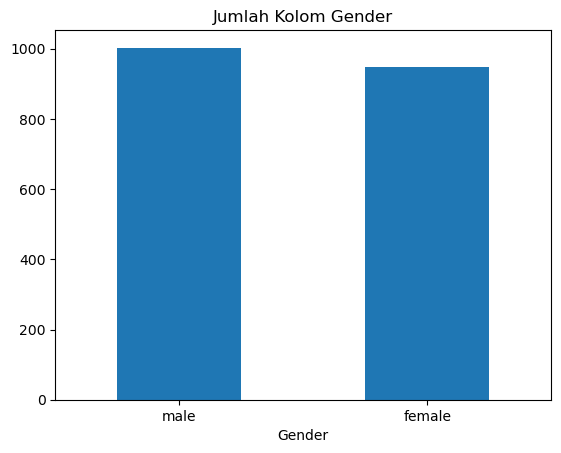

In [73]:
feature = catUsersFeatures[0]
featuresExtractDiet(feature)
plt.savefig('assets/users/uni-gender.png')

Kolom NObeyesdad

                     Jumlah sampel  Persentase
NObeyesdad                                    
obesity_type_iii               323        16.6
obesity_type_i                 283        14.5
normal_weight                  280        14.4
overweight_level_i             271        13.9
insufficient_weight            271        13.9
obesity_type_ii                268        13.7
overweight_level_ii            254        13.0


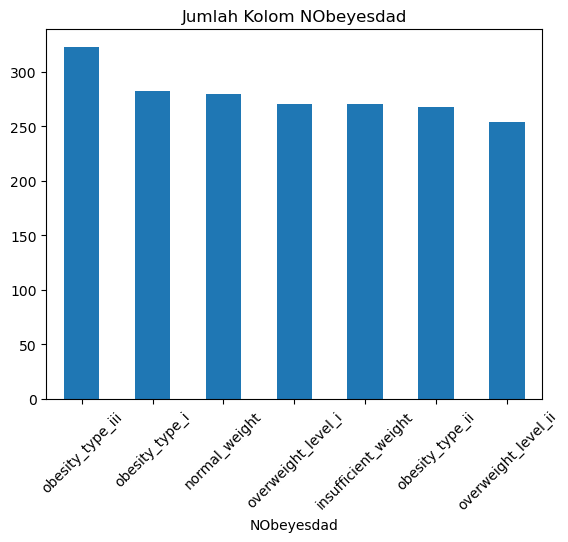

In [74]:
feature = catUsersFeatures[1]
featuresExtractDiet(feature)
plt.savefig('assets/users/uni-nobeyesdad.png')

Kolom family_history_with_overweight

                                Jumlah sampel  Persentase
family_history_with_overweight                           
yes                                      1578        80.9
no                                        372        19.1


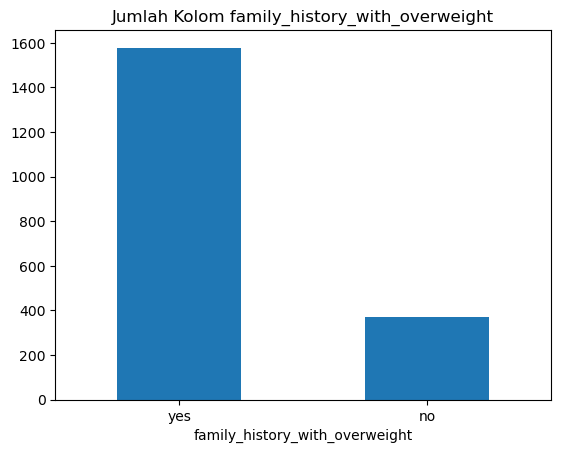

In [75]:
feature = catUsersFeatures[2]
featuresExtractDiet(feature)
plt.savefig('assets/users/uni-family.png')

2. Olah Numerical Features

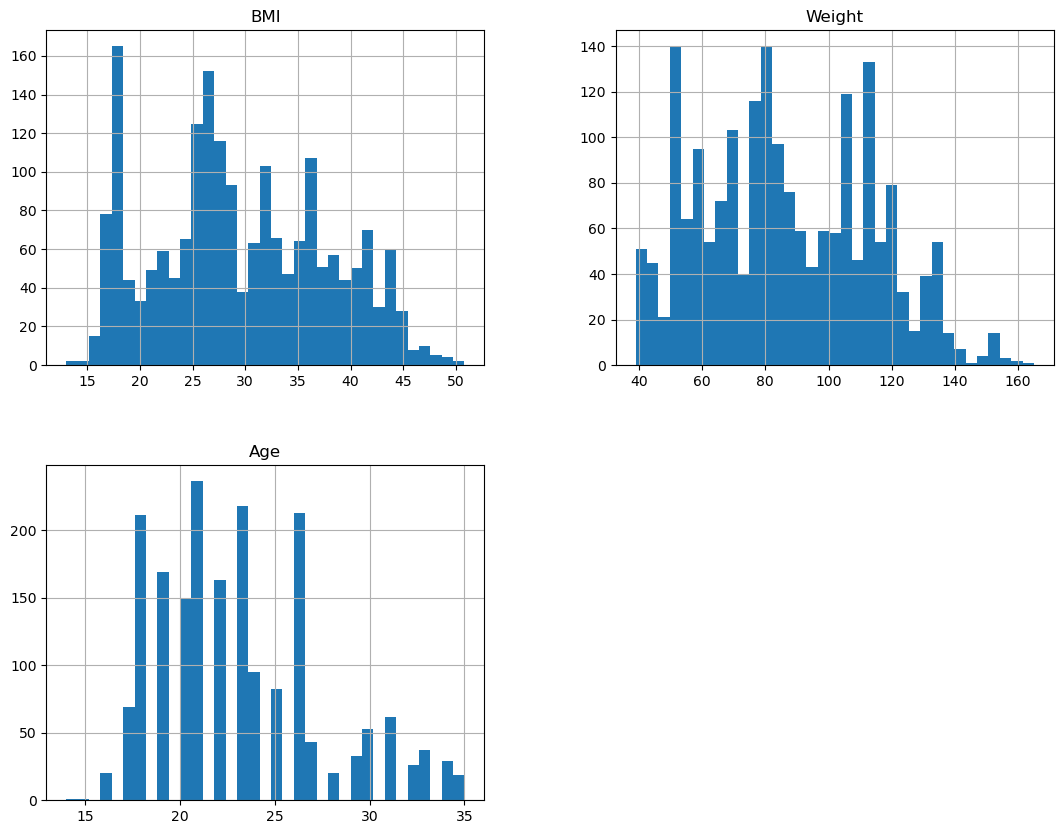

In [76]:
cleanedUsers.hist(bins=35, figsize=(13,10))
plt.savefig('assets/users/uni-numerical.png')
plt.show()

Dari hasil pemetaan kolom numerik di atas, dapat disimpulkan bahwa:
1. Kolom BMI
   - Pada kolom BMI persebaran banyak data cenderung rata. Dengan perolehan banyak data terbanyak ada di kisaran angka 18.
    - Banyak BMI terendah ada di angka 50.
2. Kolom Weight
   - Pada kolom Weight persebaran banyak data cenderung miring ke kanan (*right-skewed*). Dengan perolehan banyak data terbanyak ada di kisaran angka 50 dan 80.
    - Banyak angka terendah ada di kisaran angka 140 - 160.
3. Kolom Age
   - Pada kolom Age persebaran banyak data cenderung miring ke kanan (*right-skewed*). 
   - Banyak data terbanyak ada pada angka 21.
   - Banyak data terendah ada di kisaran angka 28 - 35.

# Data Preparation

## Pengecekan dan Penyimpulan *Missing Value* Ulang

### Data Diet

In [77]:
cleanedDiets.isnull().sum()

Diet_type       0
Recipe_name     0
Cuisine_type    0
Protein(g)      0
Carbs(g)        0
Fat(g)          0
dtype: int64

### Data *Users*

In [78]:
cleanedUsers.isnull().sum()

id                                0
BMI                               0
Weight                            0
Gender                            0
Age                               0
NObeyesdad                        0
family_history_with_overweight    0
dtype: int64

Dari hasil inspeksi lanjutan di atas, sudah tidak ada data *null* yang terkandung di dalam kedua dataset meskipun telah melalui banyak langkah pemrosesan. Dapat disimpulkan bahwa data sudah baik.

## Mengurutkan Data Berdasarkan Kategori Tertentu


### Data Diet

Pengurutan dilakukan pada nilai kategori diet dan tipe masakan.

In [79]:
fixDiet = cleanedDiets.sort_values(['Diet_type', 'Cuisine_type'], ascending=True)

In [80]:
fixDiet.head()

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g)
6061,dash,100-Mile Dash,american,1.90,236.76,1.02
6063,dash,Garlicky Wilted Kale (With A Dash Of Nutmeg),american,29.41,75.78,47.80
6065,dash,Three Dots And A Dash,american,0.51,139.67,0.00
6068,dash,Aztec Chocolate Bark,american,34.28,227.68,134.18
6070,dash,Spaghetti Squash With Maple Syrup And Shallots...,american,8.54,128.66,39.43


Saat ini data sudah diurutkan berdasarkan kedua fitur tersebut.

### Data *Users*

Data diurutkan berdasarkan tipe berat badan.

In [81]:
fixUsers = cleanedUsers.sort_values('NObeyesdad', ascending=True)

In [82]:
fixUsers.head()

,id,BMI,Weight,Gender,Age,NObeyesdad,family_history_with_overweight
740,741,17.904117,42.0,female,19,insufficient_weight,no
581,582,17.190859,59.0,male,19,insufficient_weight,yes
580,581,17.814455,59.0,male,17,insufficient_weight,yes
579,580,17.390428,59.0,male,17,insufficient_weight,yes
578,579,17.921313,42.0,female,19,insufficient_weight,no


Saat ini data sudah diurutkan berdasarkan jenis berat badan.

## Pengecekan dan Penyimpulan Data Duplikat Ulang

Setelah dilakukan pengurutan, perlu memastikan bahwa data yang diloloskan harus merupakan data unik

### Data Diet

Pengecekan data duplikat dilakukan pada fitur resep makanan

In [83]:
fixDiet.shape

(5960, 6)

In [84]:
fixDiet['Recipe_name'].duplicated().sum()

590

Terlihat ada data duplikat yang ada didalam dataset diet. Selanjutnya adalah melakukan proses penghapusan data duplikat pada data resep makanan.

In [85]:
fixDiet = fixDiet.drop_duplicates('Recipe_name')

In [86]:
fixDiet.shape

(5370, 6)

Setelah dilakukan penghapusan data duplikat, banyak baris data menjadi berkurang. Tetapi masih cukup untuk dilakukan *modeling*.

### Data User

Pengecekan data duplikat dilakukan pada fitur ID

In [87]:
fixUsers.shape

(1950, 7)

In [88]:
fixUsers['id'].duplicated().sum()

0

Setelah dilakukan pengecekan data duplikat pada fitur **id**, terlihat sudah tidak ada data duplikat disana. Maka tidak perlu dilakukan proses penghapusan data duplikat.

## Rekonstruksi Urutan Kolom

Yang dilakukan pada tahap ini adalah mengubah urutan kolom pada setiap dataset menjadi lebih mudah dilihat, dan mengubah penamaan yang tidak konsisten agar lebih rapi. Selain itu, juga membuat sebuah fitur baru yang merupakan hasil penggabungan fitur-fitur penting agar dapat dilakukan proses rekomendasi. Dan juga menambahkan nilai ID pada setiap data tipe diet dan detailnya.

### Data Diet


In [89]:
# id
idDiet = range(1, fixDiet.shape[0] + 1)

# Tipe Diet
dietName = fixDiet['Diet_type'].tolist()

# Nama Resep
recipeName = fixDiet['Recipe_name'].tolist()
# Jenis Masakan
cuisineType = fixDiet['Cuisine_type'].tolist()

# Kadar Protein
protein = fixDiet['Protein(g)'].tolist()

# Kadar Karbohidrat
carbs = fixDiet['Carbs(g)'].tolist()

# Kadar Lemak
fat = fixDiet['Fat(g)'].tolist()

# Gabungan Fitur Diet, Nama Resep, dan Jenis Masakan
mixedFeature = fixDiet['Diet_type'] + ' ' + fixDiet['Recipe_name'] + ' ' + fixDiet['Cuisine_type']


In [90]:
dietDf = pd.DataFrame({
    'id_diet': idDiet,
    'tipe_diet': dietName,
    'tipe_masakan': cuisineType,
    'resep_masakan': recipeName,
    'kadar_protein': protein,
    'kadar_karbo': carbs,
    'kadar_lemak': fat,
    'fitur_tfidf': mixedFeature
})

In [91]:
dietDf.head()

,id_diet,tipe_diet,tipe_masakan,resep_masakan,kadar_protein,kadar_karbo,kadar_lemak,fitur_tfidf
6061,1,dash,american,100-Mile Dash,1.90,236.76,1.02,dash 100-Mile Dash american
6063,2,dash,american,Garlicky Wilted Kale (With A Dash Of Nutmeg),29.41,75.78,47.80,dash Garlicky Wilted Kale (With A Dash Of Nutm...
6065,3,dash,american,Three Dots And A Dash,0.51,139.67,0.00,dash Three Dots And A Dash american
6068,4,dash,american,Aztec Chocolate Bark,34.28,227.68,134.18,dash Aztec Chocolate Bark american
6070,5,dash,american,Spaghetti Squash With Maple Syrup And Shallots...,8.54,128.66,39.43,dash Spaghetti Squash With Maple Syrup And Sha...


### Data *Users*

In [92]:
# id
idUser = fixUsers['id'].tolist()

# Jumlah BMI
bmi = fixUsers['BMI'].tolist()

# Berat Badan
weight = fixUsers['Weight'].tolist()

# Jenis Kelamin
gender = fixUsers['Gender'].tolist()

# Usia
age = fixUsers['Age'].tolist()

# Tipe Obesitas
obesityType = fixUsers['NObeyesdad'].tolist()

# Riwayat Keluarga Obesitas
historyFam = fixUsers['family_history_with_overweight'].tolist()

In [93]:
userDf = pd.DataFrame({
    'id_user': idUser,
    'jenis_kelamin': gender,
    'usia': age,
    'tipe_berat_badan': obesityType,
    'BMI': bmi,
    'berat_badan': weight,
    'keturunan_obesitas': historyFam
})

In [94]:
userDf.head()

,id_user,jenis_kelamin,usia,tipe_berat_badan,BMI,berat_badan,keturunan_obesitas
0,741,female,19,insufficient_weight,17.904117,42.0,no
1,582,male,19,insufficient_weight,17.190859,59.0,yes
2,581,male,17,insufficient_weight,17.814455,59.0,yes
3,580,male,17,insufficient_weight,17.390428,59.0,yes
4,579,female,19,insufficient_weight,17.921313,42.0,no


# Model Development

## Content-based Filtering

Pada tahap *model development* pada **Content-based Filtering** ini, akan dilakukan pemodelan sistem rekomendasi berdasarkan jenis atau tipe diet  beserta jenis masakannya. Maka dari itu, data yang digunakan adalah **data diet**. Hal-hal yang perlu dipersiapkan adalah sebagai berikut:

### TF-IDF Vectorizer

Penerapan fungsi ini ditujukan untuk mencari nilai vektor sebagai representasi fitur yang digunakan, yaitu fitur **fitur_tfidf**.

Perhitungan IDF Pada Nilai *Unique*

In [95]:
# Pemanggilan TFIDF
tfidf = TfidfVectorizer()

# Pengambilan nilai unique dari data
uniqueValues = dietDf['fitur_tfidf'].unique()

# Pengubahan nilai dalam bentuk matriks
tfidfMatrix = tfidf.fit_transform(uniqueValues)


### Pembuatan Fungsi Rekomendasi

In [96]:
def getRecommendationsContent(dietType, cuType, nutritionalData, n=10):
    # Penggabungan kedua input teks
    inputText = f'{dietType} {cuType}'
   
    # Pengubahan input teks menjadi vektor
    tfidf = TfidfVectorizer()
    tfidfMatrix = tfidf.fit_transform(dietDf['fitur_tfidf'].unique())
    inputTfidf = tfidf.transform([inputText])
   
    # Pencarian Nilai Similarity dari inputan
    simScores = cosine_similarity(inputTfidf, tfidfMatrix).flatten()
   
    # Reshape nutritional data
    nutritionalDfReshaped = nutritionalData.reshape(1, -1)
   
    # Menambahkan nilai similarity data nutrisi
    nutritionalSim = cosine_similarity(nutritionalDfReshaped, dietDf[['kadar_protein', 'kadar_karbo', 'kadar_lemak']].values).flatten() * 2
   
    # Kombinasi kedua nilai similarity
    combinedSim = simScores + nutritionalSim
   
    # Mengurutkan skor similaritas dari tertinggi ke terendah
    sortedScores = combinedSim.argsort()[::-1]
   
    # Mengambil top n indeks similar
    top5Index = sortedScores[:n]
   
    # Mengambil data dari data asli dengan indeks yang didapatkan
    top5Recommend = dietDf.iloc[top5Index].copy() 
   
    # Menghapus Kolom fitur_tfidf
    top5Recommend = top5Recommend.drop('fitur_tfidf', axis=1)
   
    return top5Recommend

### Mendapatkan Rekomendasi 

In [99]:
# Contoh input pengguna
dietType = "mediterranean"
cuType = "chicken"
nutritionalData = np.array([99.66, 116.78, 118.14])  # Contoh data nutrisi (protein, karbo, lemak)

# Memanggil fungsi dengan input pengguna
recommendations = getRecommendationsContent(dietType, cuType, nutritionalData, n=10)

# Mencetak 5 rekomendasi teratas
recommendations


,id_diet,tipe_diet,tipe_masakan,resep_masakan,kadar_protein,kadar_karbo,kadar_lemak
4324,2639,mediterranean,mediterranean,Mediterranean Chicken,99.66,116.78,118.14
4441,2706,mediterranean,mediterranean,Roasted Mediterranean Chicken,166.33,154.45,133.42
5851,3276,mediterranean,mediterranean,Chicken Mediterranean Recipes,76.68,104.36,49.95
5210,3043,mediterranean,mediterranean,Mediterranean Chicken Salad Recipes,34.06,54.17,35.91
4506,2735,mediterranean,mediterranean,Mediterranean Chicken Salad,126.39,137.70,59.16
5675,3201,mediterranean,mediterranean,Mediterranean Chicken Wrap,41.38,55.18,45.58
4470,2552,mediterranean,italian,Mediterranean Chicken Pizza,132.19,188.73,117.34
4602,2794,mediterranean,mediterranean,Mediterranean Grilled Chicken Salad,169.19,99.96,176.90
4549,2759,mediterranean,mediterranean,Grilled Mediterranean Chicken Salad,156.63,146.77,89.22
5733,3229,mediterranean,mediterranean,Mediterranean Chicken Focaccia,127.55,186.18,174.71
